In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns
import plotly as py
import pandas as pd
import numpy as np
import nltk as nlp
import re
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('data.csv',encoding='latin1')

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


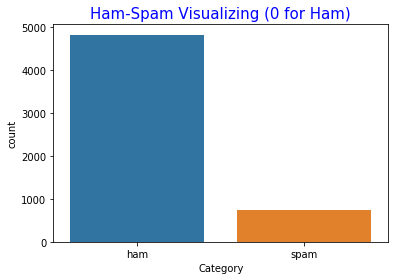

ham     4825
spam     747
Name: Category, dtype: int64

In [4]:
sns.countplot(data.Category)
plt.title('Ham-Spam Visualizing (0 for Ham)',color='blue', fontsize=15)
plt.show()
data.Category.value_counts()

In [5]:
data.Category = [1 if each == 'spam' else 0 for each in data.Category] #marked it as 1 if it is a spam
data.head(10)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [6]:
all_words = data['Message'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
    x = all_words.index.values[2:50],
    y = all_words.values[2:50],
    marker= dict(colorscale='Jet',
                 color = all_words.values[2:100]
                ),
    text='Word counts'
)]

layout = go.Layout(
    title = dict(
        text = '<b> Top 50 (Uncleaned) Word frequencies in the training dataset</b>',
        x = 0.49, y = .93,
        font = dict(
            family = 'Italic',
            size = 15,
            color = 'Black')
    ),
    xaxis = dict(
        title = dict(
            text = 'Words',
            font = dict(family = 'Italic',
                        size = 20,
                        color = 'Black')
        ),
        ticklen = 5,
        zeroline = False
    ),
    yaxis = dict(title = dict(text = 'Count',
                              font = dict(family = 'Italic',
                                          size = 20,
                                          color = 'Black')
                             ),
                 ticklen = 5,
                 zeroline = False
                )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [7]:
data = pd.read_csv('data.csv',encoding='latin1')

# list comprehension
lemma = nlp.WordNetLemmatizer()
msg_list = []

for Message in data.Message:
    Message = re.sub('[^a-z A-Z]',' ',Message).lower()
    Message = nlp.word_tokenize(Message)
    Message = [word for word in Message if not word in set(stopwords.words('english'))]
    Message = [lemma.lemmatize(word) for word in Message]
    Message = ' '.join(Message)
    msg_list.append(Message)
    
msg_list[:10]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free']

In [8]:
# extracting irrelevant words
count_vectorizer = CountVectorizer(stop_words='english')
sparce_matrix = count_vectorizer.fit_transform(msg_list).toarray()

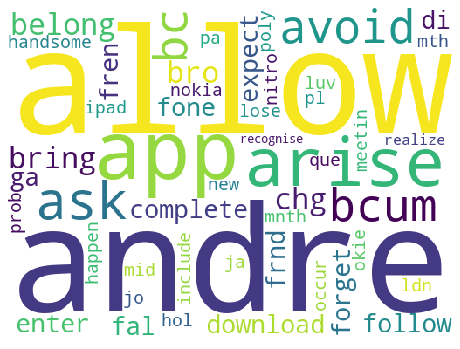

In [9]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color='white',
    max_font_size = 300,
    width=512,
    height=384,
    max_words=50
).generate(' '.join(count_vectorizer.get_feature_names()))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [10]:
# splitting data
y = data.iloc[:,0]
x = sparce_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
# training model
rf = RandomForestClassifier(n_estimators = 4, random_state=42)
rf.fit(x_train,y_train)
print("accuracy: %",rf.score(x_test,y_test)*100)

accuracy: % 97.21973094170404


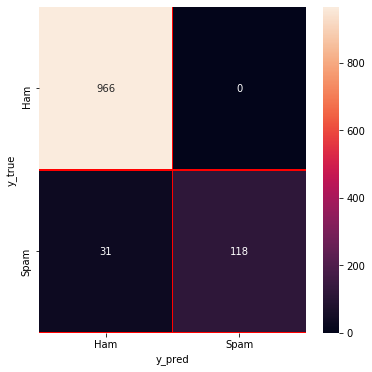

In [12]:
#confusion matrix
cm=confusion_matrix(y_test,rf.predict(x_test))
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(['Ham','Spam'])
ax.set_yticklabels(['Ham','Spam'])
plt.show()

In [13]:
# training model for LR
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("lr accuracy:%",lr.score(x_test,y_test)*100)
#there is no need for more searching model, %98 is a pretty good accuracy

lr accuracy:% 97.9372197309417


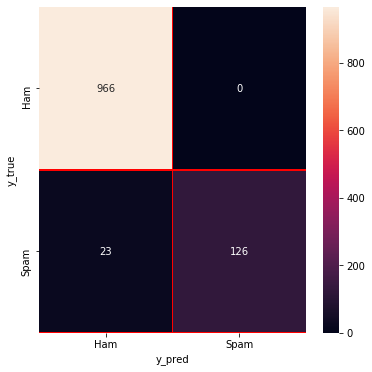

In [14]:
# Confusion Matrix for LR
cm=confusion_matrix(y_test,lr.predict(x_test))
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(['Ham','Spam'])
ax.set_yticklabels(['Ham','Spam'])
plt.show()